In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

#Dataset Info 
# 1- Student Age (1: 18-21, 2: 22-25, 3: above 26)
# 2- Sex (1: female, 2: male)
# 3- Graduated high-school type: (1: private, 2: state, 3: other)
# 4- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)
# 5- Additional work: (1: Yes, 2: No)
# 6- Regular artistic or sports activity: (1: Yes, 2: No)
# 7- Do you have a partner: (1: Yes, 2: No)
# 8- Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)
# 9- Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)
# 10- Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)
# 11- Mothersâ€™ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
# 12- Fathersâ€™ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
# 13- Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)
# 14- Parental status: (1: married, 2: divorced, 3: died - one of them or both)
# 15- Mothersâ€™ occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)
# 16- Fathersâ€™ occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)
# 17- Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)
# 18- Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)
# 19- Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)
# 20- Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)
# 21- Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)
# 22- Attendance to classes (1: always, 2: sometimes, 3: never)
# 23- Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)
# 24- Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)
# 25- Taking notes in classes: (1: never, 2: sometimes, 3: always)
# 26- Listening in classes: (1: never, 2: sometimes, 3: always)
# 27- Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)
# 28- Flip-classroom: (1: not useful, 2: useful, 3: not applicable)
# 29- Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
# 30- Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
# 31- Course ID
# 32- OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

data_set = pd.read_csv('StudentsPerformance_with_headers.csv')
df = data_set.copy()
df

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [2]:
df.describe()

,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accommodation type in Cyprus,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


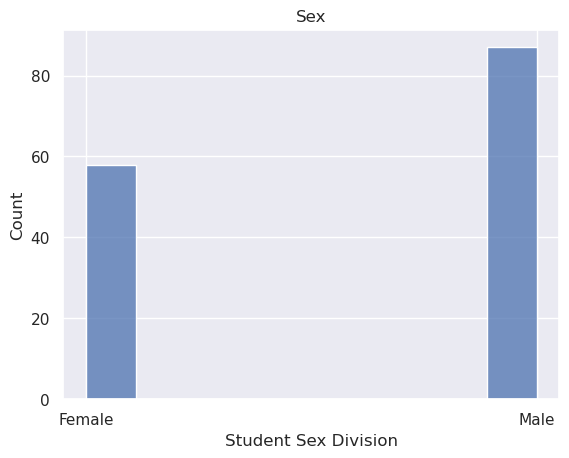

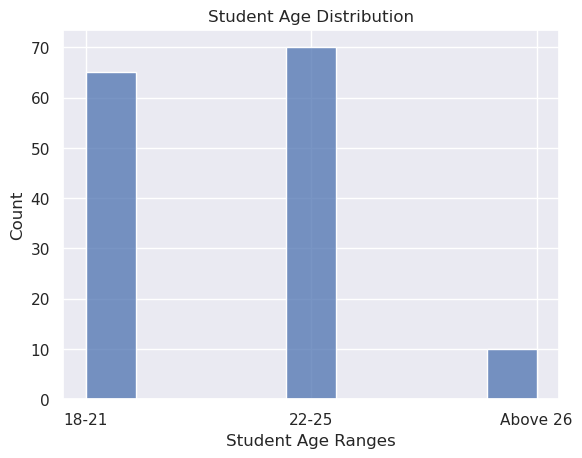

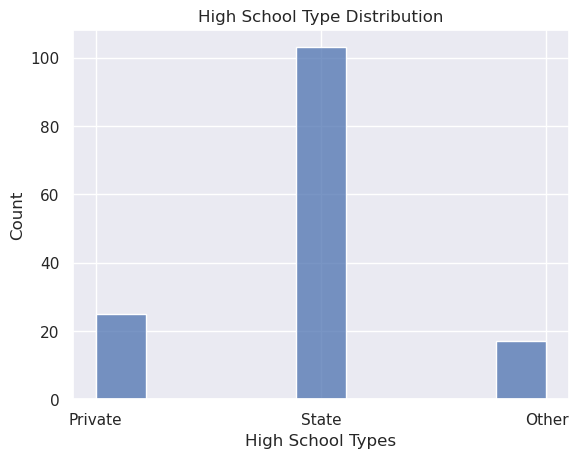

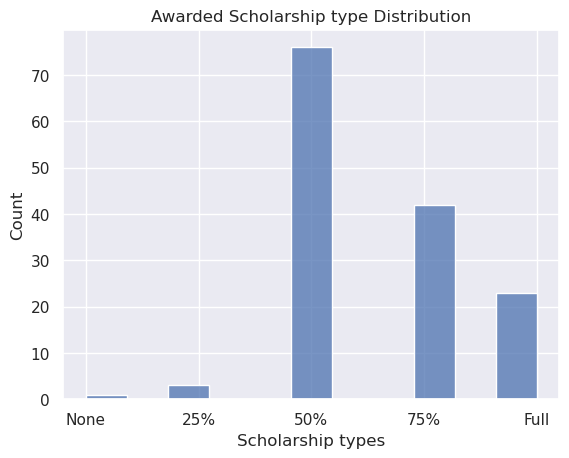

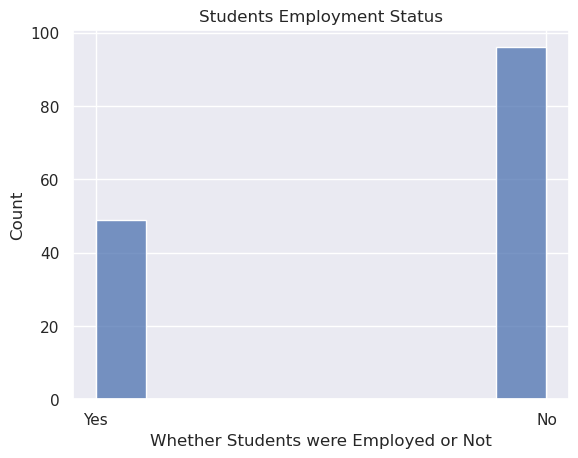

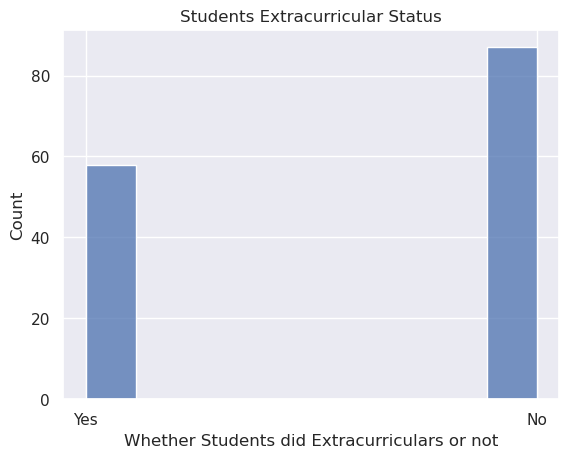

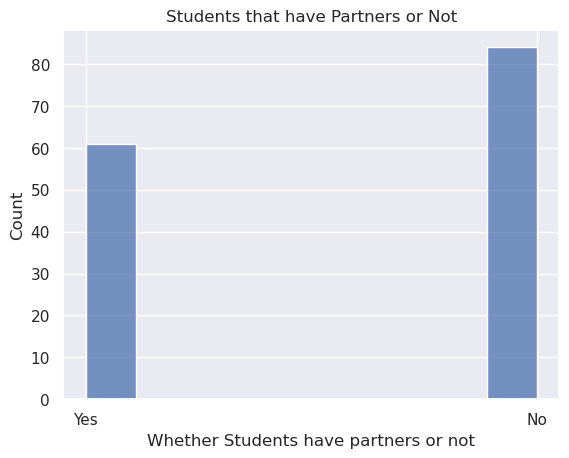

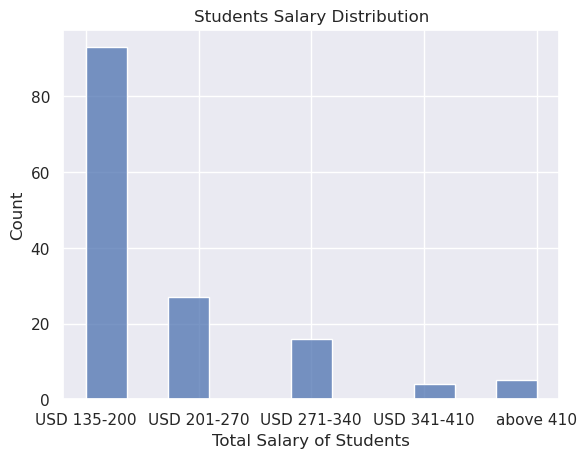

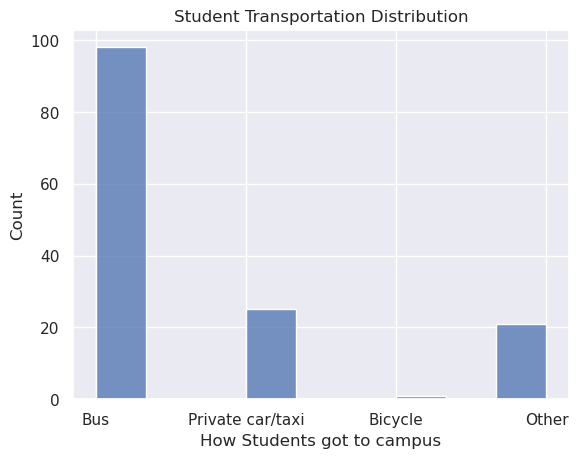

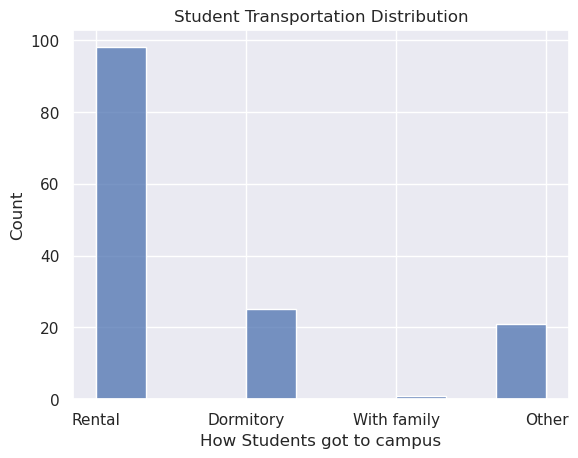

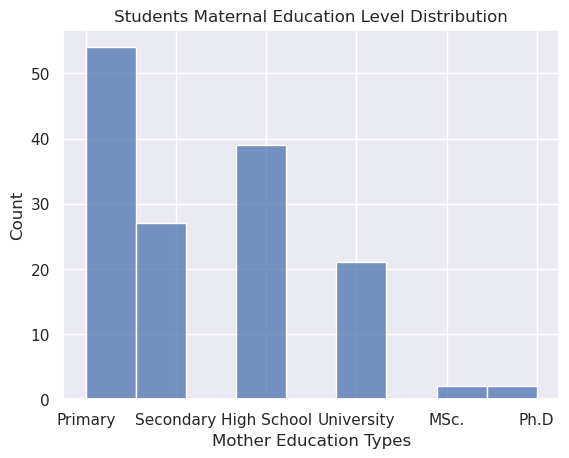

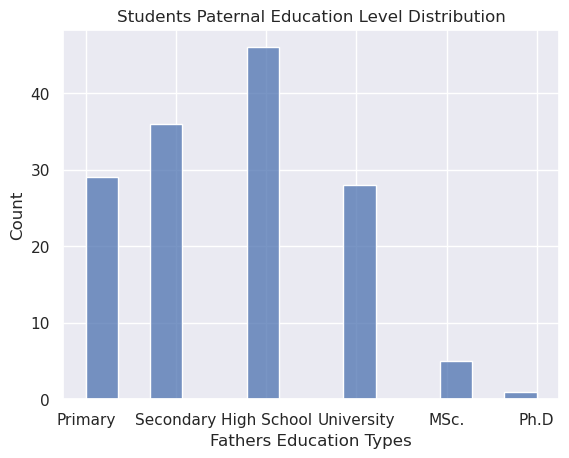

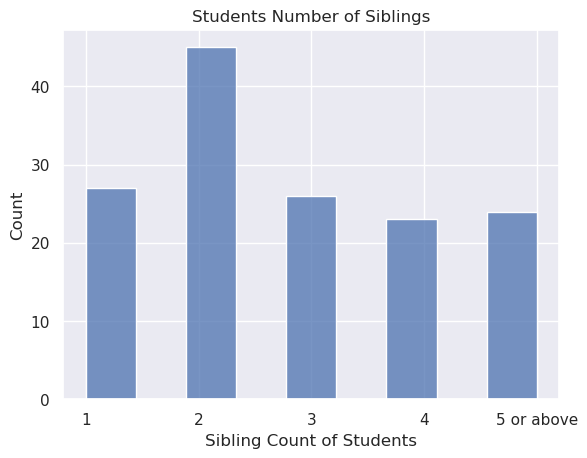

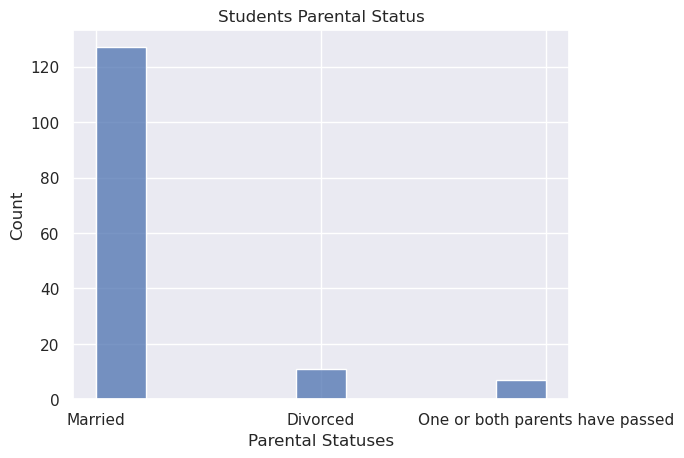

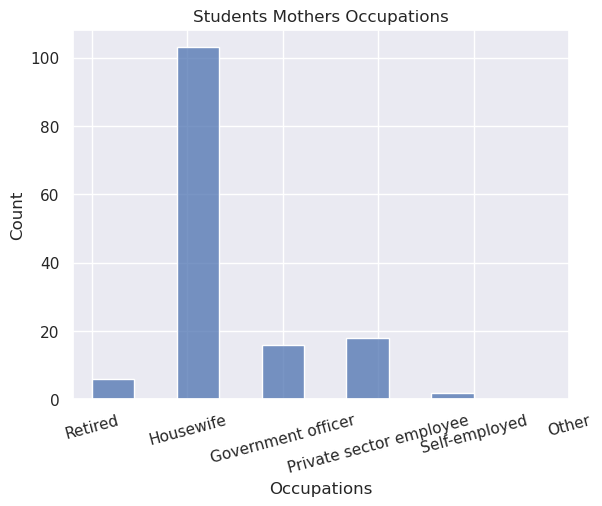

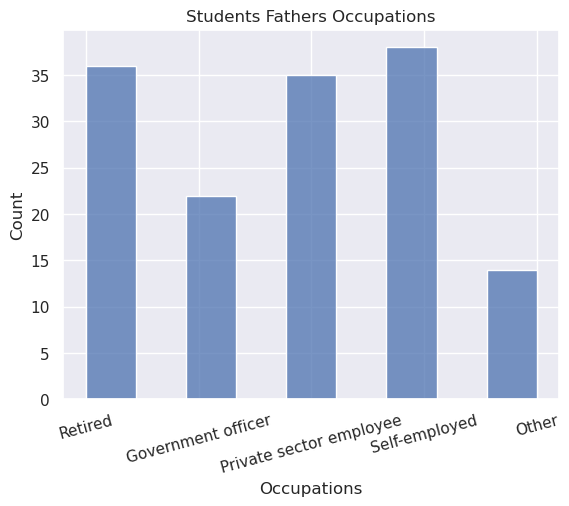

In [3]:
#Analysis of Data beforehand - Understanding what I am working with
#This section is regarding more personal information/backgrounds of students
sns.set()
h = sns.histplot(df['Sex'])
plt.xlabel('Student Sex Division')
plt.title('Sex')

h.set_xticks([1, 2])
h.set_xticklabels(["Female", "Male"])

plt.show()

h = sns.histplot(df['Student Age'])
plt.xlabel('Student Age Ranges')
plt.title('Student Age Distribution')

h.set_xticks([1, 2, 3])
h.set_xticklabels(["18-21", "22-25", "Above 26"])

plt.show()

h = sns.histplot(df['Graduated high-school type'])
plt.xlabel('High School Types')
plt.title('High School Type Distribution')

h.set_xticks([1, 2, 3])
h.set_xticklabels(["Private", "State", "Other"])

plt.show()

h = sns.histplot(df['Scholarship type'])
plt.xlabel('Scholarship types')
plt.title('Awarded Scholarship type Distribution')

h.set_xticks([1, 2, 3, 4 ,5])
h.set_xticklabels(["None", "25%", "50%", "75%", "Full"])

plt.show()

h = sns.histplot(df['Additional work'])
plt.xlabel('Whether Students were Employed or Not')
plt.title('Students Employment Status')

h.set_xticks([1, 2,])
h.set_xticklabels(["Yes", "No"])

plt.show()

h = sns.histplot(df['Regular artistic or sports activity'])
plt.xlabel('Whether Students did Extracurriculars or not')
plt.title('Students Extracurricular Status')

h.set_xticks([1, 2,])
h.set_xticklabels(["Yes", "No"])

plt.show()

h = sns.histplot(df['Do you have a partner'])
plt.xlabel('Whether Students have partners or not')
plt.title('Students that have Partners or Not')

h.set_xticks([1, 2,])
h.set_xticklabels(["Yes", "No"])

plt.show()

h = sns.histplot(df['Total salary if available'])
plt.xlabel('Total Salary of Students')
plt.title('Students Salary Distribution')

h.set_xticks([1, 2, 3, 4, 5])
h.set_xticklabels(["USD 135-200", "USD 201-270", "USD 271-340", "USD 341-410", "above 410"])

plt.show()

h = sns.histplot(df['Transportation to the university'])
plt.xlabel('How Students got to campus')
plt.title('Student Transportation Distribution')

h.set_xticks([1, 2, 3, 4])
h.set_xticklabels(["Bus", "Private car/taxi", "Bicycle", "Other"])

plt.show()

h = sns.histplot(df['Transportation to the university'])
plt.xlabel('How Students got to campus')
plt.title('Student Transportation Distribution')

h.set_xticks([1, 2, 3, 4])
h.set_xticklabels(["Rental", "Dormitory", "With family", "Other"])

plt.show()

h = sns.histplot(df['Mother’s education'])
plt.xlabel('Mother Education Types')
plt.title('Students Maternal Education Level Distribution')

h.set_xticks([1, 2, 3, 4, 5, 6])
h.set_xticklabels(["Primary", "Secondary", "High School", "University", "MSc.", "Ph.D"])

plt.show()

h = sns.histplot(df['Father’s education '])
plt.xlabel('Fathers Education Types')
plt.title('Students Paternal Education Level Distribution')

h.set_xticks([1, 2, 3, 4, 5, 6])
h.set_xticklabels(["Primary", "Secondary", "High School", "University", "MSc.", "Ph.D"])

plt.show()

h = sns.histplot(df['Number of sisters/brothers'])
plt.xlabel('Sibling Count of Students')
plt.title('Students Number of Siblings')

h.set_xticks([1, 2, 3, 4, 5])
h.set_xticklabels(["1", "2", "3", "4", "5 or above"])

plt.show()

h = sns.histplot(df['Parental status'])
plt.xlabel('Parental Statuses')
plt.title('Students Parental Status')

h.set_xticks([1, 2, 3])
h.set_xticklabels(["Married", "Divorced", "One or both parents have passed"])

plt.show()

h = sns.histplot(df['Mother’s occupation'])
plt.xlabel('Occupations')
plt.title('Students Mothers Occupations')

h.set_xticks([1, 2, 3, 4, 5 ,6])
x_labels = ("Retired", "Housewife", "Government officer", "Private sector employee", "Self-employed", "Other")
h.set_xticklabels(x_labels, rotation=15)


plt.show()

h = sns.histplot(df['Father’s occupation'])
plt.xlabel('Occupations')
plt.title('Students Fathers Occupations')

h.set_xticks([1, 2, 3, 4, 5])
x_labels = ("Retired", "Government officer", "Private sector employee", "Self-employed", "Other")
h.set_xticklabels(x_labels, rotation=15)

plt.show()

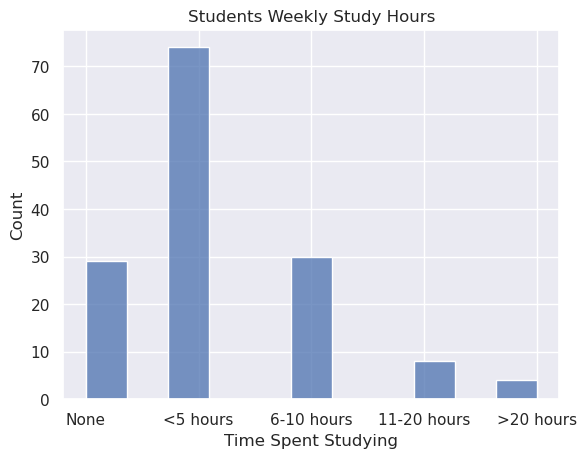

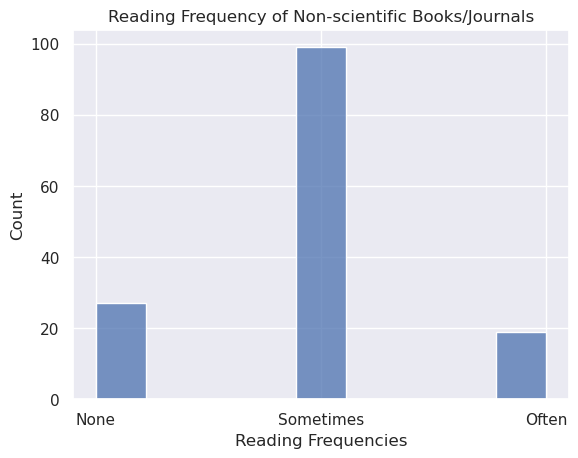

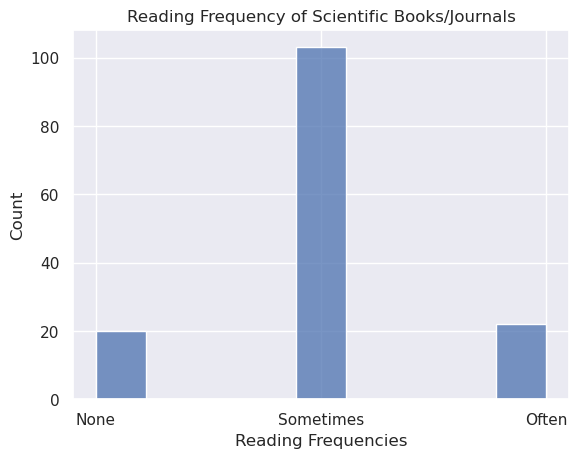

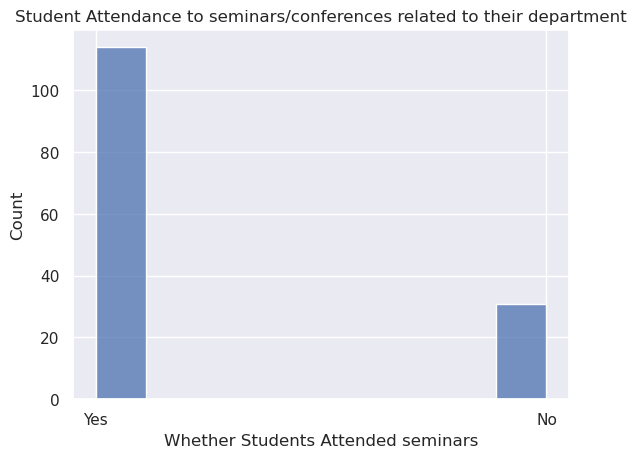

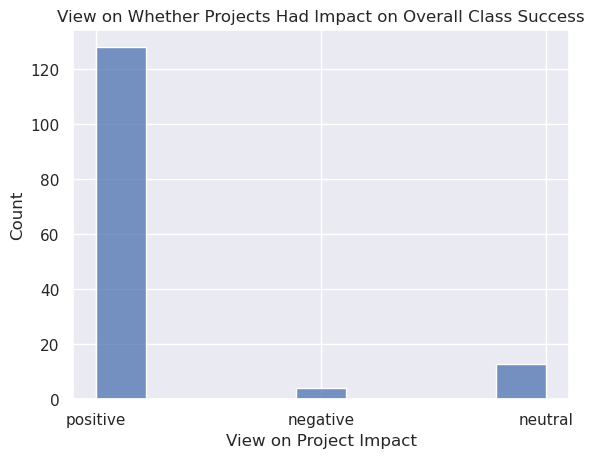

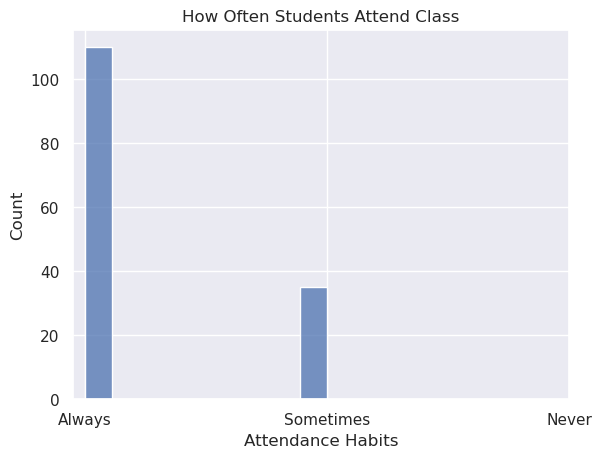

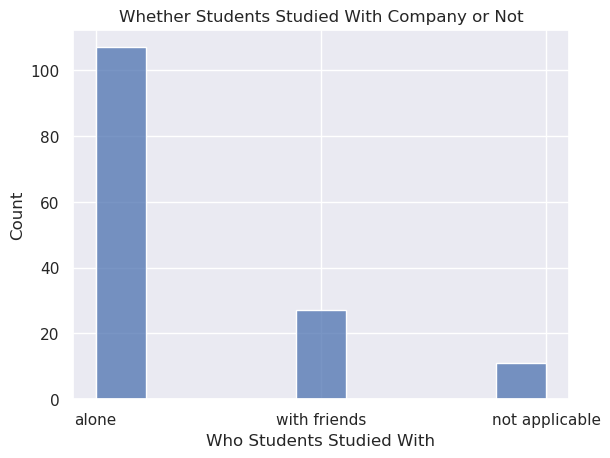

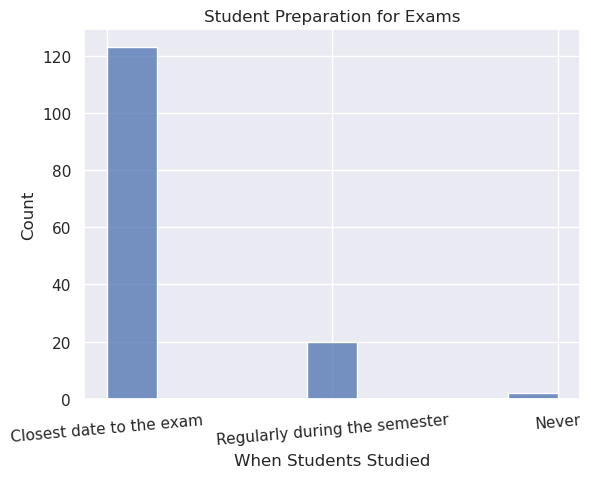

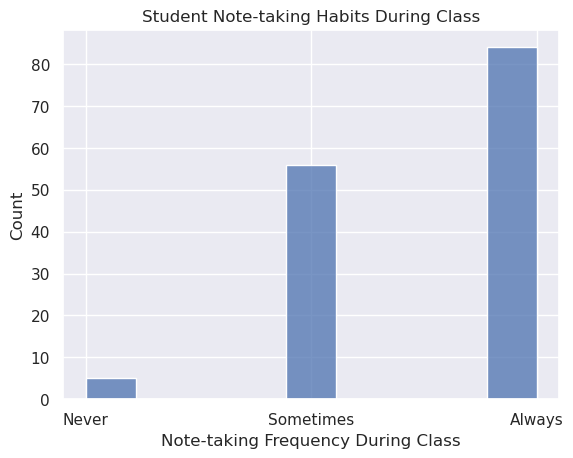

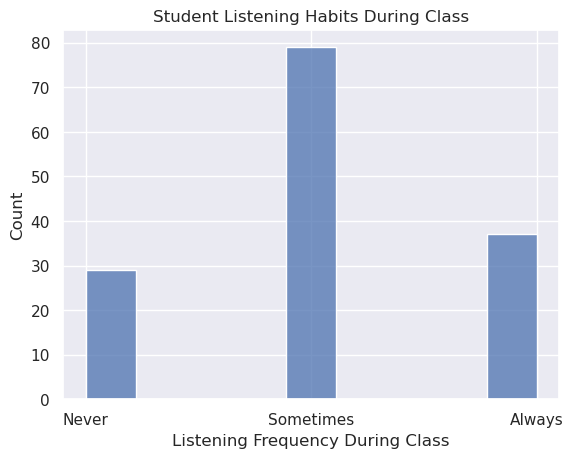

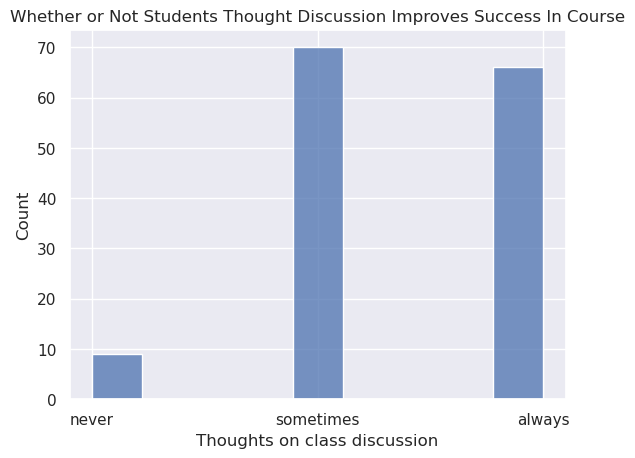

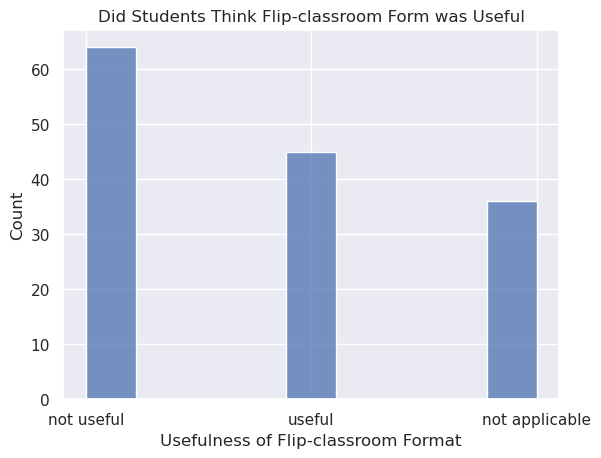

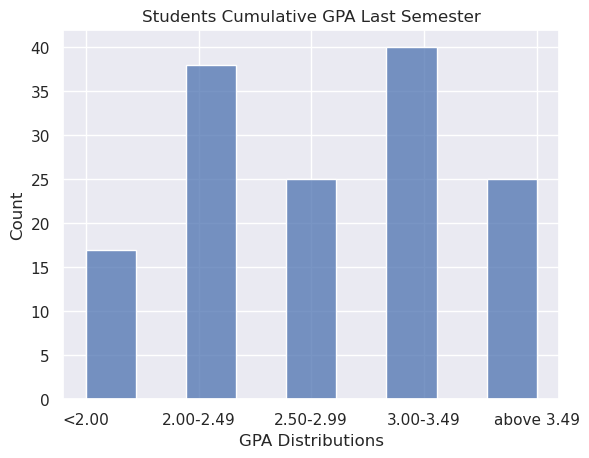

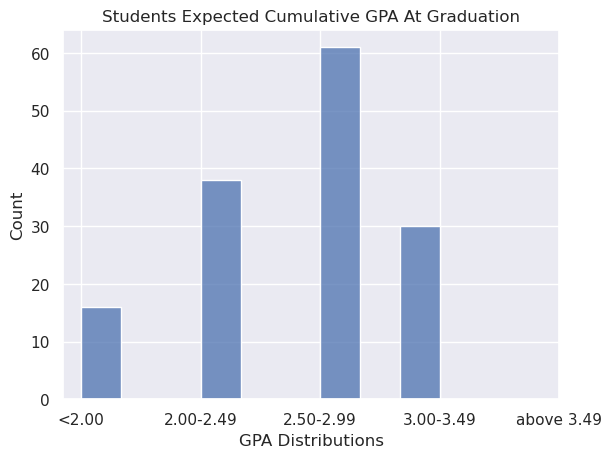

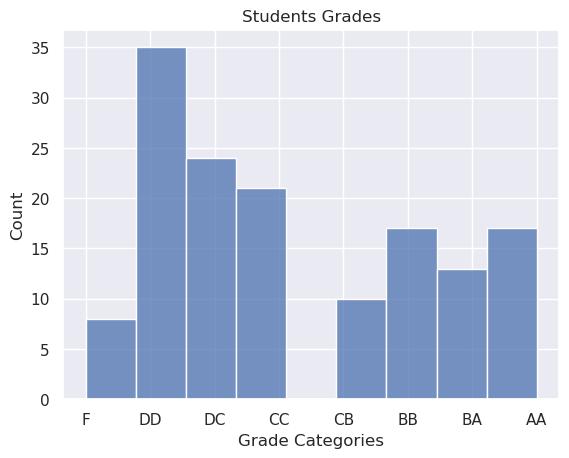

In [4]:
#Section for information more directly related to student's school habits

h = sns.histplot(df['Weekly study hours'])
plt.xlabel('Time Spent Studying')
plt.title('Students Weekly Study Hours')

h.set_xticks([1, 2, 3, 4, 5])
h.set_xticklabels(["None", "<5 hours", "6-10 hours", "11-20 hours", ">20 hours"])

plt.show()

h = sns.histplot(df['Reading frequency'])
plt.xlabel('Reading Frequencies')
plt.title('Reading Frequency of Non-scientific Books/Journals')

h.set_xticks([1, 2, 3,])
h.set_xticklabels(["None", "Sometimes", "Often"])

plt.show()

h = sns.histplot(df['Reading frequency.1'])
plt.xlabel('Reading Frequencies')
plt.title('Reading Frequency of Scientific Books/Journals')

h.set_xticks([1, 2, 3,])
h.set_xticklabels(["None", "Sometimes", "Often"])

plt.show()

h = sns.histplot(df['Attendance to the seminars/conferences related to the department'])
plt.xlabel('Whether Students Attended seminars')
plt.title('Student Attendance to seminars/conferences related to their department')

h.set_xticks([1, 2])
h.set_xticklabels(["Yes", "No"])

plt.show()

h = sns.histplot(df['Impact of your projects/activities on your success'])
plt.xlabel('View on Project Impact')
plt.title('View on Whether Projects Had Impact on Overall Class Success')

h.set_xticks([1, 2, 3])
h.set_xticklabels(["positive", "negative", "neutral"])

plt.show()

h = sns.histplot(df['Attendance to classes'])
plt.xlabel('Attendance Habits')
plt.title('How Often Students Attend Class')

h.set_xticks([1, 2, 3])
h.set_xticklabels(["Always", "Sometimes", "Never"])

plt.show()

h = sns.histplot(df['Preparation to midterm exams 1'])
plt.xlabel('Who Students Studied With')
plt.title('Whether Students Studied With Company or Not')

h.set_xticks([1, 2, 3])
h.set_xticklabels(["alone", "with friends", "not applicable"])

plt.show()

h = sns.histplot(df['Preparation to midterm exams 2'])
plt.xlabel('When Students Studied')
plt.title('Student Preparation for Exams')


h.set_xticks([1, 2, 3])
x_labels = ("Closest date to the exam", "Regularly during the semester", "Never")
h.set_xticklabels(x_labels, rotation=5)

plt.show()

h = sns.histplot(df['Taking notes in classes'])
plt.xlabel('Note-taking Frequency During Class')
plt.title('Student Note-taking Habits During Class')

h.set_xticks([1, 2, 3])
h.set_xticklabels(["Never", "Sometimes", "Always"])

plt.show()

h = sns.histplot(df['Listening in classes'])
plt.xlabel('Listening Frequency During Class')
plt.title('Student Listening Habits During Class')

h.set_xticks([1, 2, 3])
h.set_xticklabels(["Never", "Sometimes", "Always"])

plt.show()

h = sns.histplot(df['Discussion improves my interest and success in the course'])
plt.xlabel('Thoughts on class discussion')
plt.title('Whether or Not Students Thought Discussion Improves Success In Course')

h.set_xticks([1, 2, 3])
h.set_xticklabels(["never", "sometimes", "always"])

plt.show()

h = sns.histplot(df['Flip-classroom'])
plt.xlabel('Usefulness of Flip-classroom Format')
plt.title('Did Students Think Flip-classroom Form was Useful')

h.set_xticks([1, 2, 3])
h.set_xticklabels(["not useful", "useful", "not applicable"])

plt.show()

h = sns.histplot(df['Cumulative grade point average in the last semester (/4.00)'])
plt.xlabel('GPA Distributions')
plt.title('Students Cumulative GPA Last Semester')

h.set_xticks([1, 2, 3, 4, 5])
h.set_xticklabels(["<2.00", "2.00-2.49", "2.50-2.99", "3.00-3.49", "above 3.49"])

plt.show()

h = sns.histplot(df['Expected Cumulative grade point average in the graduation (/4.00)'])
plt.xlabel('GPA Distributions')
plt.title('Students Expected Cumulative GPA At Graduation')

h.set_xticks([1, 2, 3, 4, 5])
h.set_xticklabels(["<2.00", "2.00-2.49", "2.50-2.99", "3.00-3.49", "above 3.49"])

plt.show()

h = sns.histplot(df['GRADE'])
plt.xlabel('Grade Categories')
plt.title('Students Grades')

h.set_xticks([0 , 1, 2, 3, 4, 5, 6, 7])
h.set_xticklabels(["F", "DD", "DC", "CC", "CB", "BB", "BA", "AA"])

plt.show()

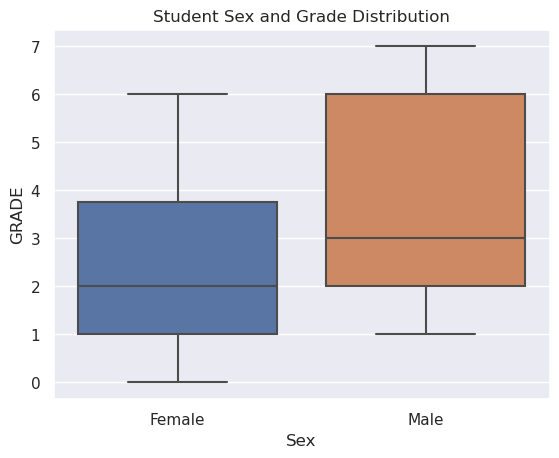

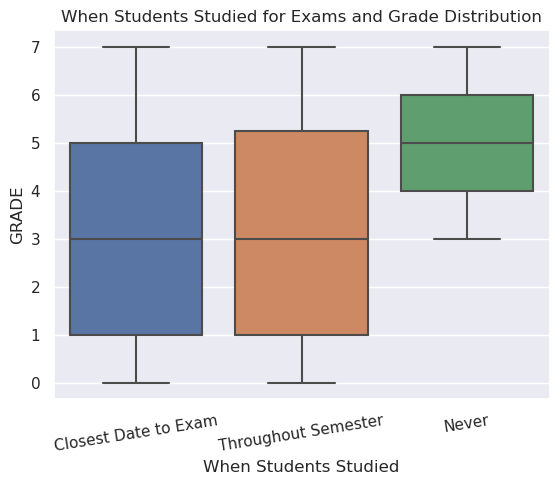

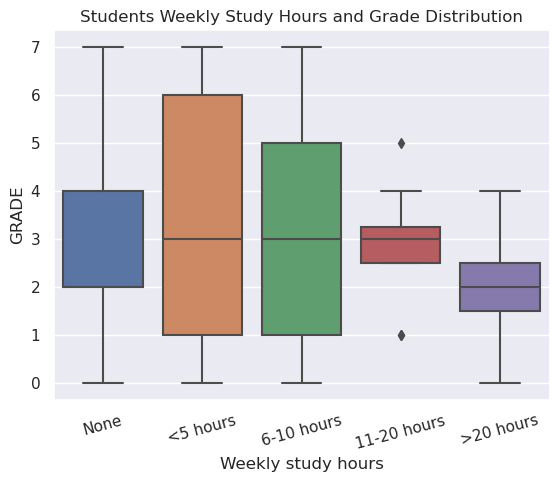

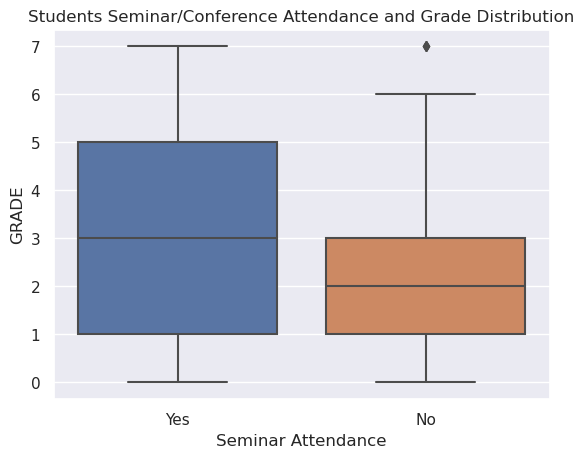

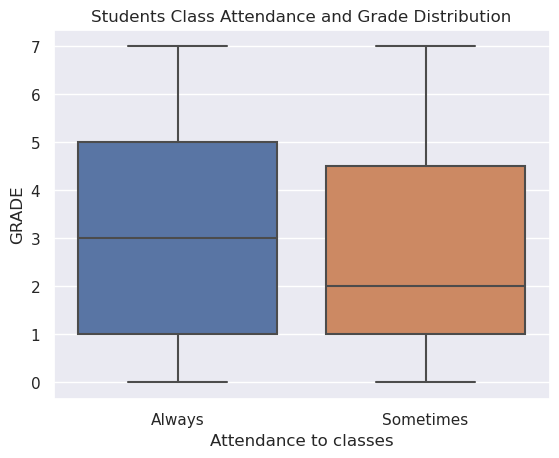

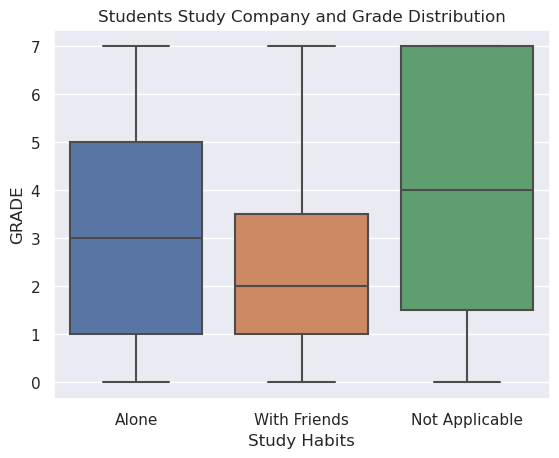

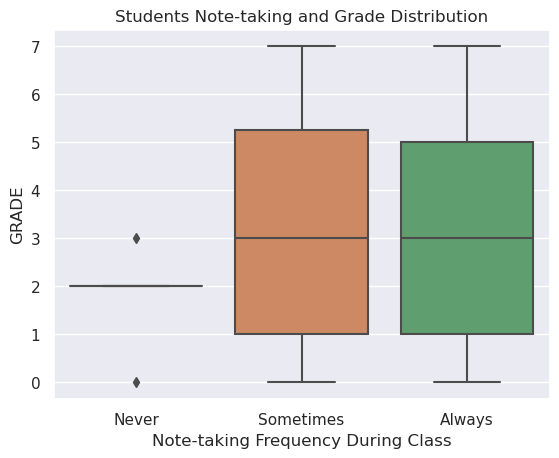

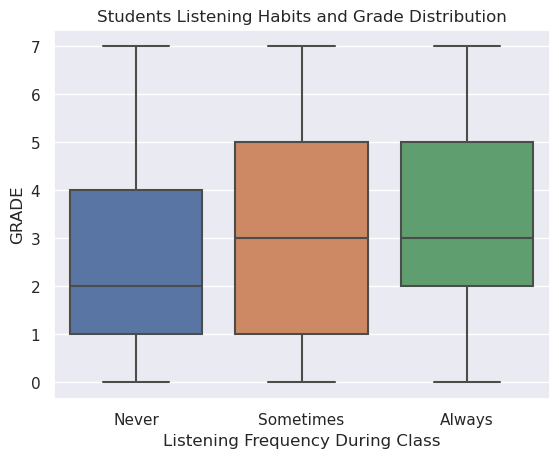

In [17]:
#Bivariate Analysis - testing out my own initial expectations
#School related checks

bp = sns.boxplot(x = df['Sex'], y = df['GRADE'])
bp.set_title('Student Sex and Grade Distribution')
x_labels = ['Female', 'Male']
bp.set_xticklabels(x_labels)
plt.show()

bp = sns.boxplot(data=df, x="Preparation to midterm exams 2", y="GRADE")
bp.set_title('When Students Studied for Exams and Grade Distribution')
plt.xlabel('When Students Studied')
x_labels = ['Closest Date to Exam', 'Throughout Semester', 'Never']
bp.set_xticklabels(x_labels, rotation=9)
plt.show()

bp = sns.boxplot(data=df, x="Weekly study hours", y="GRADE")
bp.set_title('Students Weekly Study Hours and Grade Distribution')
x_labels = ['None', '<5 hours', '6-10 hours', '11-20 hours', '>20 hours']
bp.set_xticklabels(x_labels, rotation=15)
plt.show()

bp = sns.boxplot(data=df, x="Attendance to the seminars/conferences related to the department", y="GRADE")
bp.set_title('Students Seminar/Conference Attendance and Grade Distribution')
plt.xlabel('Seminar Attendance')
x_labels = ['Yes', 'No']
bp.set_xticklabels(x_labels)
plt.show()

bp = sns.boxplot(data=df, x="Attendance to classes", y="GRADE")
bp.set_title('Students Class Attendance and Grade Distribution')
x_labels = ['Always', 'Sometimes']
bp.set_xticklabels(x_labels)
plt.show()

bp = sns.boxplot(data=df, x="Preparation to midterm exams 1", y="GRADE")
bp.set_title('Students Study Company and Grade Distribution')
plt.xlabel('Study Habits')
x_labels = ['Alone', 'With Friends', 'Not Applicable']
bp.set_xticklabels(x_labels)
plt.show()

bp = sns.boxplot(data=df, x="Taking notes in classes", y="GRADE")
bp.set_title('Students Note-taking and Grade Distribution')
plt.xlabel('Note-taking Frequency During Class')
x_labels = ['Never', 'Sometimes', 'Always']
bp.set_xticklabels(x_labels)
plt.show()

bp = sns.boxplot(data=df, x="Listening in classes", y="GRADE")
bp.set_title('Students Listening Habits and Grade Distribution')
plt.xlabel('Listening Frequency During Class')
x_labels = ['Never', 'Sometimes', 'Always']
bp.set_xticklabels(x_labels)
plt.show()

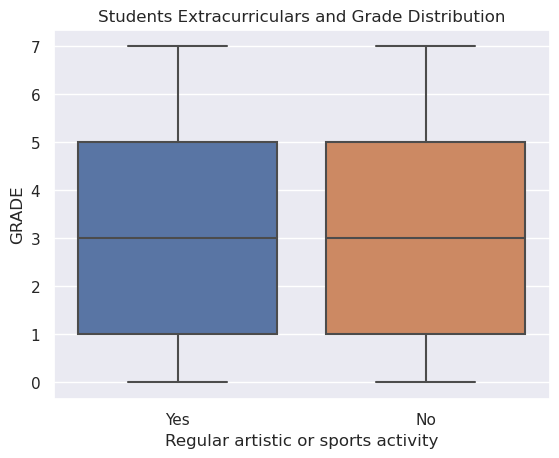

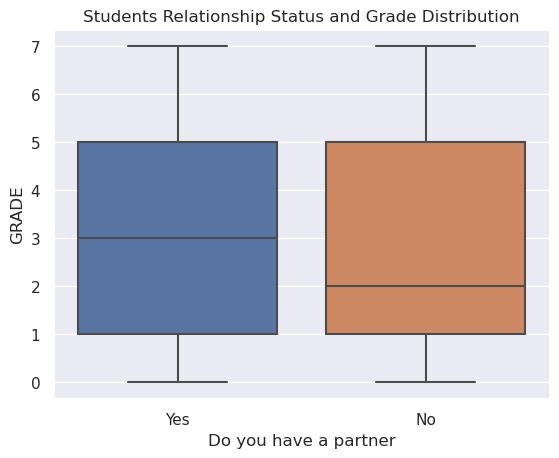

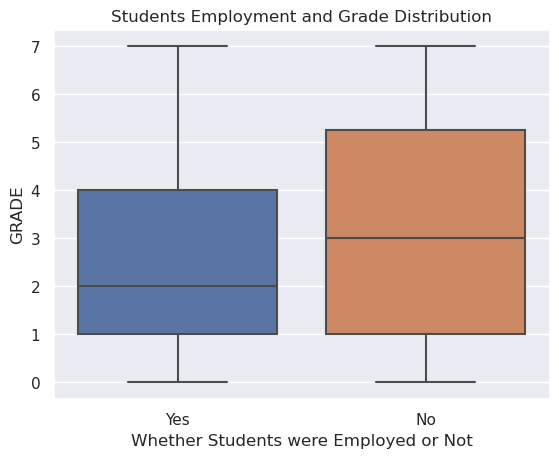

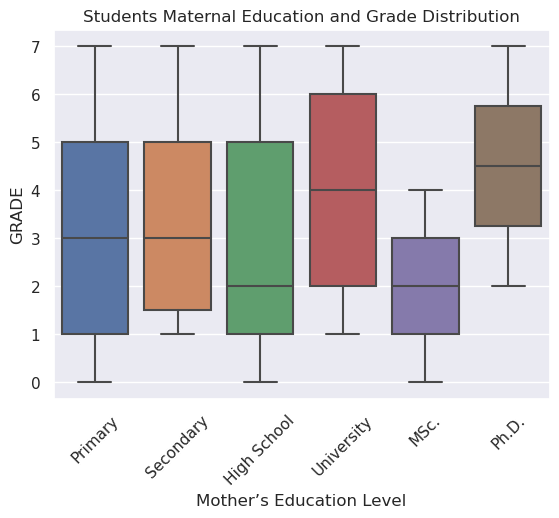

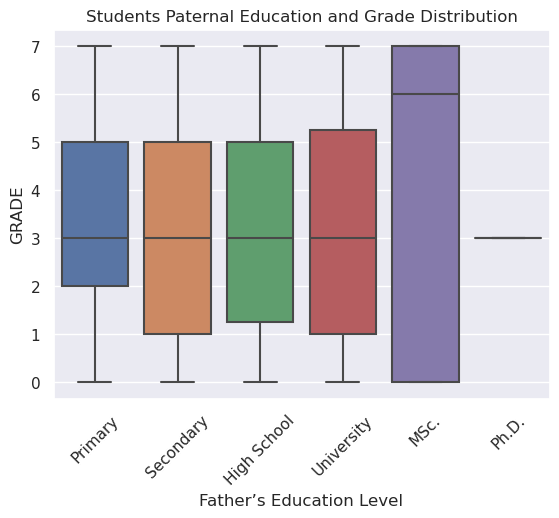

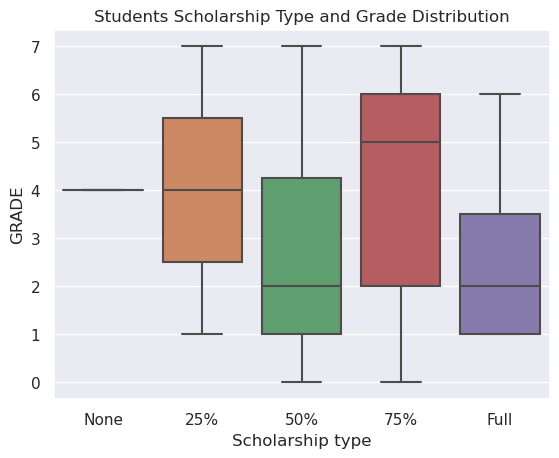

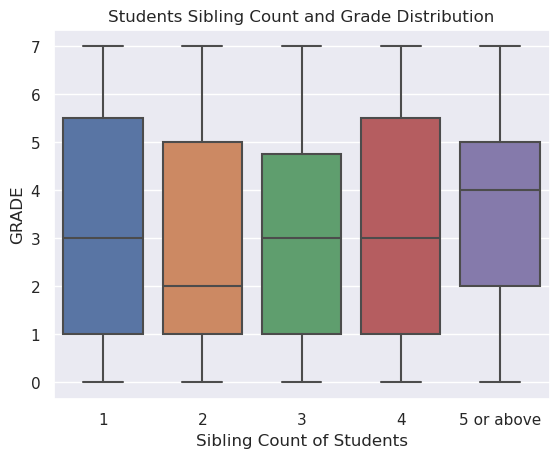

In [12]:
#Bivariate analysis of personal student comparisons
bp = sns.boxplot(data=df, x="Regular artistic or sports activity", y="GRADE")
bp.set_title('Students Extracurriculars and Grade Distribution')
x_labels = ['Yes', 'No']
bp.set_xticklabels(x_labels)
plt.show()

bp = sns.boxplot(data=df, x="Do you have a partner", y="GRADE")
bp.set_title('Students Relationship Status and Grade Distribution')
x_labels = ['Yes', 'No']
bp.set_xticklabels(x_labels)
plt.show()

bp = sns.boxplot(data=df, x="Additional work", y="GRADE")
bp.set_title('Students Employment and Grade Distribution')
plt.xlabel('Whether Students were Employed or Not')
x_labels = ['Yes', 'No']
bp.set_xticklabels(x_labels)
plt.show()

bp = sns.boxplot(data=df, x="Mother’s education", y="GRADE")
bp.set_title('Students Maternal Education and Grade Distribution')
plt.xlabel('Mother’s Education Level')
x_labels = ['Primary', 'Secondary', 'High School', 'University', 'MSc.', 'Ph.D.']
bp.set_xticklabels(x_labels, rotation=45)
plt.show()

bp = sns.boxplot(data=df, x="Father’s education ", y="GRADE")
bp.set_title('Students Paternal Education and Grade Distribution')
plt.xlabel('Father’s Education Level')
x_labels = ['Primary', 'Secondary', 'High School', 'University', 'MSc.', 'Ph.D.']
bp.set_xticklabels(x_labels, rotation=45)
plt.show()

bp = sns.boxplot(data=df, x="Scholarship type", y="GRADE")
bp.set_title('Students Scholarship Type and Grade Distribution')
x_labels = ['None', '25%', '50%', '75%', 'Full']
bp.set_xticklabels(x_labels)
plt.show()

bp = sns.boxplot(data=df, x="Number of sisters/brothers", y="GRADE")
bp.set_title('Students Sibling Count and Grade Distribution')
plt.xlabel('Sibling Count of Students')
x_labels = ['1', '2', '3', '4', '5 or above']
bp.set_xticklabels(x_labels)
plt.show()